# Practice 4 

### Martyna Baran, Zuzanna Jarlaczyńska

### Exercise 1 

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = "Desktop/bupa.data"

cols = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
liver_disorders = pd.read_csv(filename, names=cols)
liver_disorders = liver_disorders.drop(['selector'], axis =1)
liver_disorders


,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
import random, time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = liver_disorders[liver_disorders.columns[:-1]]
Y = liver_disorders['drinks']
seed=random.seed(time.time())

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.25, random_state=seed)
stdScaler = MinMaxScaler().fit(X_train)
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"Mean Squared error: {mean_squared_error(y_test, y_pred)}\n")
print(f"Root Mean Squared error: {rmse}\n")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n")
print(f"R2 score: {r2_score(y_test, y_pred)} ")


Mean Squared error: 10.488124484532715

Root Mean Squared error: 3.238537398970825

Mean Absolute Error: 2.47175708181121

R2 score: 0.08990777828621699 


In [5]:
print(f"Model coefficients:\n{model.coef_}")

Model coefficients:
[ 7.0620188  -0.80399659 -1.03722444  4.77382896  5.59847994]


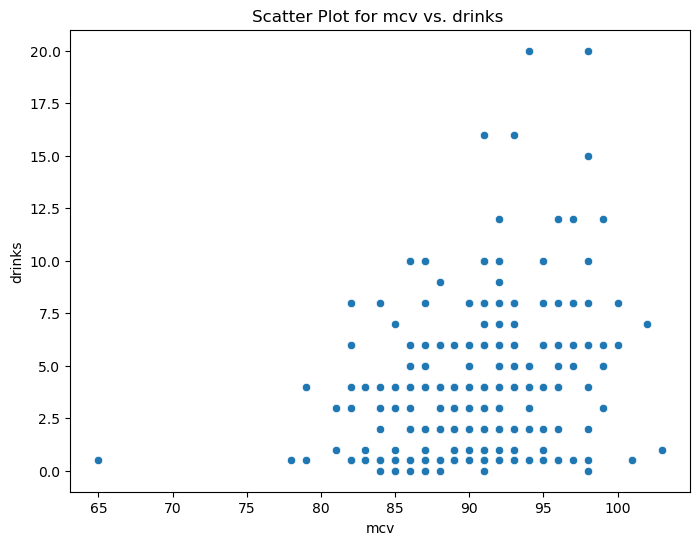

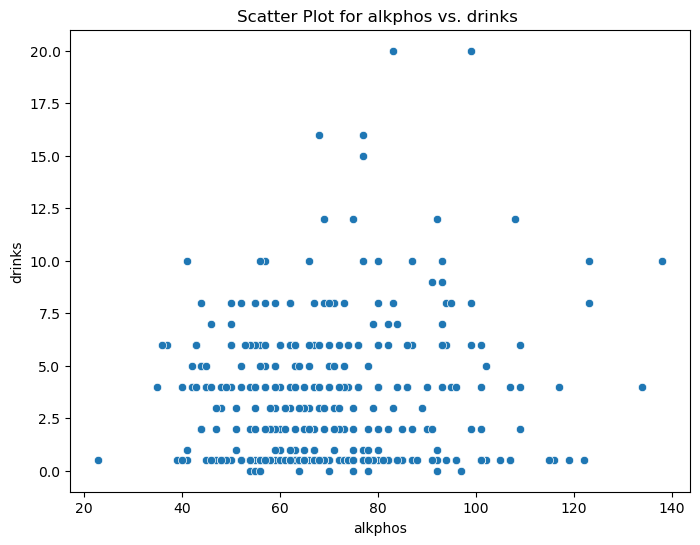

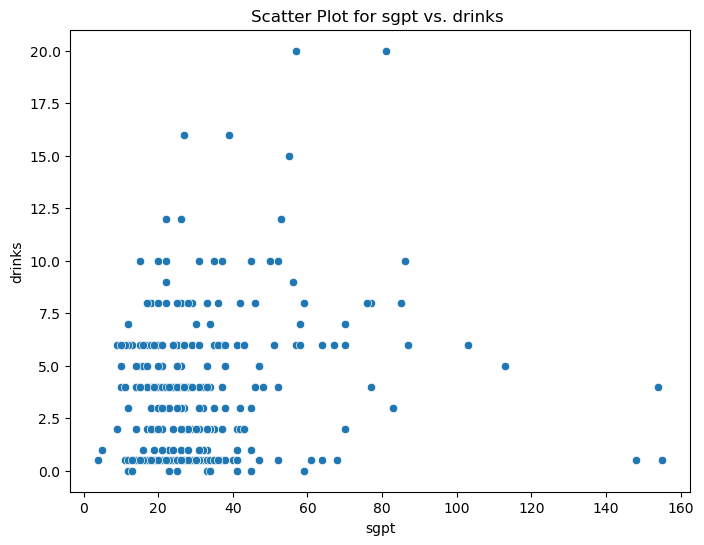

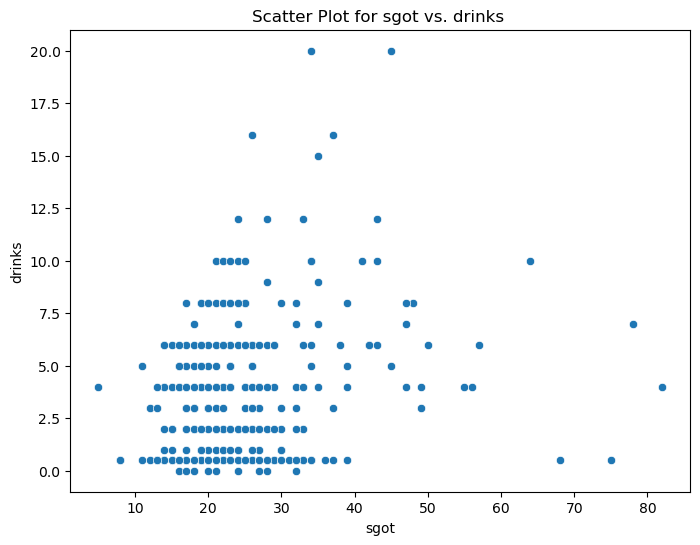

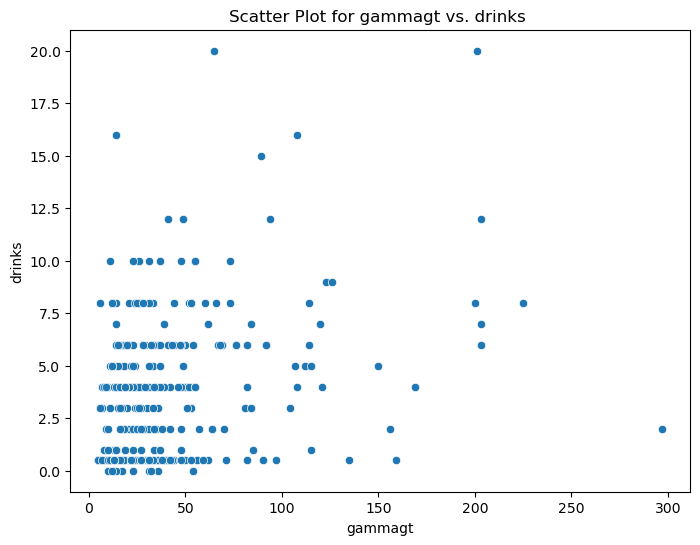

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']
    
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=liver_disorders, x=feature, y='drinks')
    plt.title(f'Scatter Plot for {feature} vs. drinks ')
    plt.xlabel(feature)
    plt.ylabel('drinks')
    plt.show()


In [7]:
X_ = X[['mcv']]
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, Y, test_size =0.25, random_state=seed)
stdScaler = MinMaxScaler().fit(X_train_)
X_train_ = stdScaler.transform(X_train_)
X_test_ = stdScaler.transform(X_test_)

model = LinearRegression()
model.fit(X_train_, y_train_)
y_pred_ = model.predict(X_test_)


In [8]:
print(f"Mean Squared error: {mean_squared_error(y_test_, y_pred_)}\n")
print(f"Root Mean Squared error: {(np.sqrt(mean_squared_error(y_test_, y_pred_)))}\n")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_, y_pred_)}\n")
print(f"Accuracy score: {accuracy_score(y_test_, y_pred_)}\n")
print(f"R2 score: {r2_score(y_test_, y_pred_)} ")

Mean Squared error: 10.093792486640037

Root Mean Squared error: 3.1770729432356504

Mean Absolute Error: 2.4238493423141017

R2 score: 0.08067655384030403 


### Exercise 2 

In [65]:
import numpy, random, time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

train_data = np.array([
    [20,1,113],
    [22,1,118],
    [25,1,127],
    [25,2,132],
    [30,2,156],
    [30,2,144],
    [30,3,138],
    [45,2,166],
    [40,2,156],
    [40,3,149]
])
X1_train = train_data[:,0]
X2_train = train_data[:,1]
X_train = train_data[:,:2]
Y_train = train_data[:,-1]
test_data = np.array([
    [35,1,200],
    [25,2,116],
    [25,2,122],
    [20,1,130],
    [35,2,150],
    [25,2,120],
    [42,1,146],
    [35,1,155],
    [40,2,156],
    [42,2,147]
])
X1_test = test_data[:,0]
X2_test = test_data[:,1]
X_test = test_data[:,:2]
Y_test = test_data[:,-1]

In [66]:
# model a
model_a = LinearRegression()
model_a.fit(X1_train.reshape(-1,1),Y_train)
print("Model a: ")
print("w1 = ",model_a.coef_)
print("w0 = ", model_a.intercept_)
Y_predict_a = model_a.predict(X1_test.reshape(-1,1))
print("Predictions of the A model: ")
print(Y_predict_a)
# model b
model_b = LinearRegression()
model_b.fit(X2_train.reshape(-1,1),Y_train)
print("Model b: ")
print("w2 = ",model_b.coef_)
print("w0 = ", model_b.intercept_)
Y_predict_b = model_b.predict(X2_test.reshape(-1,1))
print("Predictions of the B model: ")
print(Y_predict_b)
# model c
X_train = np.column_stack((X1_train, X2_train))
X_test = np.column_stack((X1_test, X2_test))
model_c = LinearRegression()
model_c.fit(X_train,Y_train)
print("Model c: ")
print("w1 = ",model_c.coef_[0])
print("w2 = ",model_c.coef_[1] )
print("w0 = ", model_c.intercept_)
Y_predict_c = model_c.predict(X_test)
print("Predictions of the C model: ")
print(Y_predict_c)

Model a: 
w1 =  [1.87935657]
w0 =  82.20375335120647
Predictions of the A model: 
[147.98123324 129.18766756 129.18766756 119.79088472 147.98123324
 129.18766756 161.13672922 147.98123324 157.37801609 161.13672922]
Model b: 
w2 =  [14.06122449]
w0 =  113.18367346938774
Predictions of the B model: 
[127.24489796 141.30612245 141.30612245 127.24489796 141.30612245
 141.30612245 127.24489796 127.24489796 141.30612245 141.30612245]
Model c: 
w1 =  1.7842142639748393
w2 =  1.7901998579689535
w0 =  81.72324236583142
Predictions of the C model: 
[145.96094146 129.90899868 129.90899868 119.1977275  147.75114132
 129.90899868 158.45044131 145.96094146 156.67221264 160.24064117]


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#model 1 
print("MODEL A")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_a)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_a))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_a)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_a)}")

print("MODEL 2")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_b)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_b))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_b)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_b)}")

print("MODEL 3")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_c)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_c))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_c)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_c)}")


MODEL A
Mean Square Error: 360.4373624478002
Root Mean Square Error: 18.985187975045182
Mean Absolute Error: 13.147989276139407
R2 score: 0.3434178037602008
MODEL 2
Mean Square Error: 821.3985839233653
Root Mean Square Error: 28.660052057234044
Mean Absolute Error: 21.70204081632653
R2 score: -0.4962813026875643
MODEL 3
Mean Square Error: 380.8651579800747
Root Mean Square Error: 19.51576690730023
Mean Absolute Error: 13.421953941361462
R2 score: 0.3062059931869815


### Exercise 3 

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X1_train_scaled = X_train_scaled[:,0]
X2_train_scaled = X_train_scaled[:,1]
X1_test_scaled = X_test_scaled[:,0]
X2_test_scaled = X_test_scaled[:,1]

# model a
model_a1 = LinearRegression()
model_a1.fit(X1_train_scaled.reshape(-1,1),Y_train)
print("Model a scaled : ")
print("w1 = ",model_a1.coef_)
print("w0 = ", model_a1.intercept_)
Y_predict_a1 = model_a1.predict(X1_test_scaled.reshape(-1,1))
print("Predictions of the A scaled model: ")
print(Y_predict_a1)


# model b
model_b1 = LinearRegression()
model_b1.fit(X2_train_scaled.reshape(-1,1),Y_train)
print("Model b scaled : ")
print("w2 = ",model_b1.coef_)
print("w0 = ", model_b1.intercept_)
Y_predict_b1 = model_b1.predict(X2_test_scaled.reshape(-1,1))
print("Predictions of the B scaled model: ")
print(Y_predict_b1)

# model c
X_train2 = np.column_stack((X1_train_scaled, X2_train_scaled))
X_test2 = np.column_stack((X1_test_scaled, X2_test_scaled))
model_c1 = LinearRegression()
model_c1.fit(X_train2,Y_train)
print("Model c scaled: ")
print("w1 = ",model_c1.coef_[0])
print("w2 = ",model_c1.coef_[1] )
print("w0 = ", model_c1.intercept_)
Y_predict_c1 = model_c1.predict(X_test2)
print("Predictions of the C scaled model: ")
print(Y_predict_c1)

Model a scaled : 
w1 =  [46.98391421]
w0 =  119.79088471849867
Predictions of the A scaled model: 
[147.98123324 129.18766756 129.18766756 119.79088472 147.98123324
 129.18766756 161.13672922 147.98123324 157.37801609 161.13672922]
Model b scaled : 
w2 =  [28.12244898]
w0 =  127.24489795918367
Predictions of the B scaled model: 
[127.24489796 141.30612245 141.30612245 127.24489796 141.30612245
 141.30612245 127.24489796 127.24489796 141.30612245 141.30612245]
Model c scaled: 
w1 =  44.605356599371
w2 =  3.5803997159379235
w0 =  119.19772750329716
Predictions of the C scaled model: 
[145.96094146 129.90899868 129.90899868 119.1977275  147.75114132
 129.90899868 158.45044131 145.96094146 156.67221264 160.24064117]


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#model 1 
print("MODEL A")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_a1)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_a1))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_a1)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_a1)}")

print("MODEL 2")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_b1)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_b1))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_b1)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_b1)}")

print("MODEL 3")
print(f"Mean Square Error: {mean_squared_error(Y_test, Y_predict_c1)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_predict_c1))}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_predict_c1)}")
print(f"R2 score: {r2_score(Y_test, Y_predict_c1)}")

MODEL A
Mean Square Error: 360.4373624478002
Root Mean Square Error: 18.985187975045182
Mean Absolute Error: 13.147989276139407
R2 score: 0.3434178037602008
MODEL 2
Mean Square Error: 821.3985839233653
Root Mean Square Error: 28.660052057234044
Mean Absolute Error: 21.70204081632653
R2 score: -0.4962813026875643
MODEL 3
Mean Square Error: 380.86515798007446
Root Mean Square Error: 19.515766907300222
Mean Absolute Error: 13.421953941361462
R2 score: 0.30620599318698194


### Exercise 4 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report


heart_filename = "Desktop/heart.csv"
columns = ['age', 'sex','cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
heartData = pd.read_csv(heart_filename, names=columns)
heartData = heartData.drop(0)
heartData

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [76]:
X = heartData[heartData.columns[:-1]]
Y = heartData['output']
seed=random.seed(time.time())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25, random_state=seed)
stdScaler = MinMaxScaler().fit(X_train)
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)


In [77]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

In [78]:
cm = confusion_matrix(Y_test, y_pred)
acc1= accuracy_score(Y_test, y_pred)
r21 = r2_score(Y_test, y_pred)
MSE1 = mean_squared_error(Y_test, y_pred)

print(f"Confusion matrix: \n{cm}")
print(f"Accuracy score: {acc1}")
print(f"R2 score: {r21} ")
print(f"Mean Squared error: {MSE1}")

Confusion matrix: 
[[32  7]
 [ 5 32]]
Accuracy score: 0.8421052631578947
R2 score: 0.36798336798336784 
Mean Squared error: 0.15789473684210525


In [79]:
coefficients = logreg.coef_
odds_ratios = np.exp(coefficients)

feature_names = [i for i in columns[:-1]]
odds_ratios_df = pd.DataFrame(odds_ratios,index = ['ratio'], columns=feature_names)
print(f"Odds ratios for each feature:\n\n{odds_ratios_df}")  

Odds ratios for each feature:

            age       sex         cp   trtbps      chol       fbs   restecg  \
ratio  1.079834  0.160234  16.500531  0.03373  0.105269  0.967721  3.285528   

        thalachh      exng   oldpeak       slp       caa     thall  
ratio  10.183566  0.605041  0.007486  3.027084  0.034777  0.087586  


Coefficients for each feature:

          age       sex        cp    trtbps      chol       fbs   restecg  \
coef -0.27748 -1.893737  2.376665 -1.865004 -2.086161 -0.032062  0.649901   

      thalachh     exng   oldpeak       slp       caa     thall  
coef  3.504217 -1.15644 -3.134188  1.499682 -2.920797 -2.819531  



Text(0, 0.5, 'Coefficient Value')

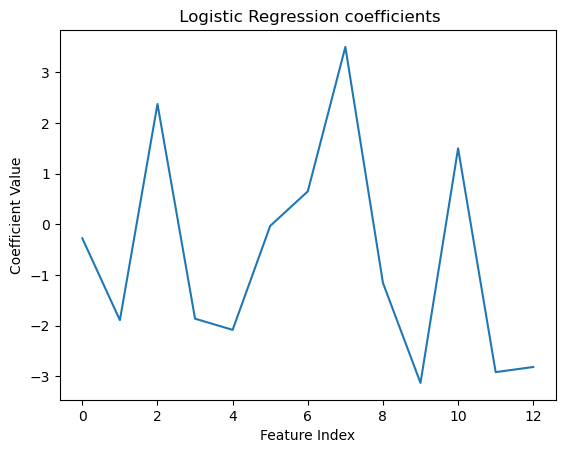

In [33]:
coefficients = logreg.coef_    
feature_names = [i for i in columns[0:-1]]
coefficients_df = pd.DataFrame(coefficients, index=['coef'], columns=feature_names)
print(f"Coefficients for each feature:\n\n{coefficients_df}\n")    
plt.plot(model_logreg.coef_.flatten())
plt.title(' Logistic Regression coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

In [81]:
#Logitic Regression model with L1 penalty

l1 = LogisticRegression(penalty='l1', solver='liblinear')
l1.fit(X_train, Y_train)
y_pred = l1.predict(X_test)

acc2= accuracy_score(Y_test, y_pred)
r22 = r2_score(Y_test, y_pred)
MSE2 = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE2}")
print(f"R2 score: {r22}")
print(f"Accuracy: {acc2}")
print(f"% of stripped off coefficients for L1: {np.mean(l1.coef_.ravel()==0)}")

Mean Squared Error: 0.17105263157894737
R2 score: 0.3153153153153152
Accuracy: 0.8289473684210527
% of stripped off coefficients for L1: 0.23076923076923078


In [82]:
#Logistic Regression model with an L2 penalty:

l2 = LogisticRegression(penalty='l2', C=10)
l2.fit(X_train, Y_train)
y_pred = l2.predict(X_test)

acc3 = accuracy_score(Y_test, y_pred)
r23 = r2_score(Y_test, y_pred)
MSE3 = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE3}")
print(f"R2 score: {r23}")
print(f"Accuracy: {acc3}")

Mean Squared Error: 0.13157894736842105
R2 score: 0.4733194733194732
Accuracy: 0.868421052631579


In [83]:
print(f'Accuracy:\nfirst model:{acc1}\nL1 penalty:{acc2}\nL2 penalty:{acc3}\n')
print(f'MSE:\nfirst model:{MSE1}\nL1 penalty:{MSE2}\nL2 penalty:{MSE3}\n')
print(f'R2 score:\nfirst model:{r21}\nL1 penalty:{r22}\nL2 penalty:{r23}\n')

print(f"Coefficients first model:\n{logreg.coef_}")
print(f"Coefficients L1:\n{l1.coef_}\n")
print(f"Coefficients L2:\n{l2.coef_}")

Accuracy:
first model:0.8421052631578947
L1 penalty:0.8289473684210527
L2 penalty:0.868421052631579

MSE:
first model:0.15789473684210525
L1 penalty:0.17105263157894737
L2 penalty:0.13157894736842105

R2 score:
first model:0.36798336798336784
L1 penalty:0.3153153153153152
L2 penalty:0.4733194733194732

Coefficients first model:
[[ 0.07680692 -1.83112149  2.80339256 -3.38938083 -2.25123175 -0.03281118
   1.18952739  2.32077522 -0.50245867 -4.89474811  1.10759984 -3.35878966
  -2.4351382 ]]
Coefficients L1:
[[ 0.         -1.15033559  2.1393624  -1.22666048  0.          0.
   0.85578786  1.71443556 -0.46364995 -2.49263946  1.17965597 -2.56425417
  -1.22867415]]

Coefficients L2:
[[-0.27625185 -1.67697017  2.5407703  -2.67630457 -1.53615183 -0.0120083
   1.11355076  1.8319374  -0.56990382 -3.81283854  1.18381675 -3.04798062
  -2.19188313]]


### Exercise 5 

In [84]:
Zoo_filename = "Downloads/zoo.data"
columns = ['animal_name', 'hair','feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
zooData = pd.read_csv(Zoo_filename, names=columns)
zooData = zooData.drop(['animal_name'], axis=1)
zooData

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [85]:
X_zoo = zooData[zooData.columns[:-1]]
Y_zoo = zooData['type']

#spliting data into test and train set
seed = random.randint(0, 100)
X_train, X_test, Y_train, Y_test = train_test_split(X_zoo, Y_zoo,test_size=0.2, random_state=seed,stratify=Y_zoo)

#scaling data
stdScaler = StandardScaler().fit(X_train)
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

#applying Logistic Regression
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)


In [86]:
from sklearn import metrics

#calculating classification metrics
cm = confusion_matrix(Y_test, y_pred)
acc1= accuracy_score(Y_test, y_pred)
r21 = r2_score(Y_test, y_pred)
MSE1 = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE1}")
print(f"R2 score: {r21}")
print(f"Accuracy: {acc1}")


Mean Squared Error: 0.9523809523809523
R2 score: 0.7848360655737705
Accuracy: 0.9047619047619048


In [49]:
logreg.coef_
coefficients = logreg.coef_
odds_ratios = np.exp(coefficients)
    
class_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']
feature_names = [i for i in columns[1:-1]]
odds_ratios_df = pd.DataFrame(odds_ratios, index=class_names, columns=feature_names)
print(f"Odds ratios for each class and feature:\n\n{odds_ratios_df}")    

Odds ratios for each class and feature:

            hair    feathers      eggs       milk   airborne     aquatic  \
class1  9.993901    0.267527  0.020764  53.053550   0.610780    0.931128   
class2  0.587539  313.243235  1.750499   0.587590   5.090932    1.072216   
class3  0.195517    0.037293  9.239776   0.184732   0.409788    0.004097   
class4  1.218632    0.856252  2.872045   0.345109   0.998455    2.578259   
class5  0.477271    0.508954  2.456894   0.423178   0.572947  201.658673   
class6  2.924764    1.024892  4.604615   1.086639  12.729324    0.132495   
class7  0.512052    0.716412  0.091642   1.094217   0.107773    3.548709   

         predator   toothed   backbone  breathes  venomous       fins  \
class1   0.735274  9.272189   3.307854  4.066354  0.423519   2.639478   
class2   1.439429  0.112493   2.190535  1.803087  0.628513   0.567926   
class3   1.052015  1.991705  11.035121  2.527140  2.102063   0.387517   
class4   0.746121  1.908486   1.603593  0.020280  2.824276

Coefficients for each class and feature:

            hair  feathers      eggs      milk  airborne   aquatic  predator  \
class1  2.301975 -1.318534 -3.874529  3.971302 -0.493018 -0.071359 -0.307512   
class2 -0.531812  5.746980  0.559901 -0.531726  1.627461  0.069727  0.364246   
class3 -1.632106 -3.288945  2.223518 -1.688847 -0.892116 -5.497432  0.050708   
class4  0.197729 -0.155190  1.055024 -1.063895 -0.001546  0.947114 -0.292868   
class5 -0.739670 -0.675398  0.898898 -0.859963 -0.556962  5.306577 -0.274990   
class6  1.073214  0.024587  1.527059  0.083090  2.543908 -2.021211 -1.901427   
class7 -0.669330 -0.333500 -2.389871  0.090039 -2.227727  1.266584  2.361843   

         toothed  backbone  breathes  venomous      fins      legs      tail  \
class1  2.227019  1.196300  1.402747 -0.859157  0.970581 -0.552255  0.268752   
class2 -2.184863  0.784146  0.589500 -0.464399 -0.565765 -1.264671  0.986981   
class3  0.688991  2.401083  0.927088  0.742919 -0.947995 -0.296672  2.246925 

Text(0, 0.5, 'Coefficient Value')

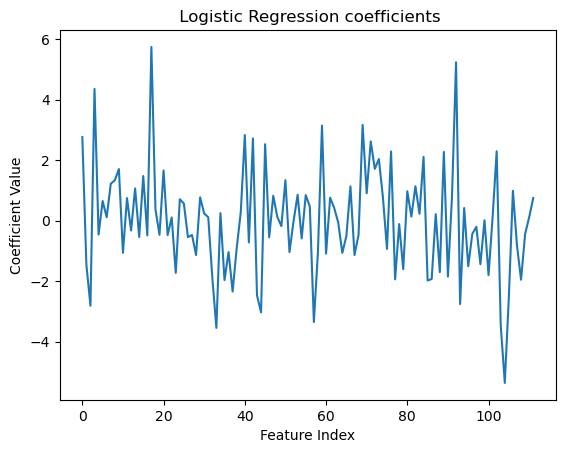

In [50]:
coefficients = logreg.coef_    
class_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']
feature_names = [i for i in columns[1:-1]]
coefficients_df = pd.DataFrame(coefficients, index=class_names, columns=feature_names)
print(f"Coefficients for each class and feature:\n\n{coefficients_df}\n")    
plt.plot(log_reg.coef_.flatten())
plt.title(' Logistic Regression coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')


In [87]:
#Logitic Regression model with L1 penalty

l1 = LogisticRegression(penalty='l1', solver='liblinear')
l1.fit(X_train, Y_train)
y_pred = l1.predict(X_test)

acc2= accuracy_score(Y_test, y_pred)
r22 = r2_score(Y_test, y_pred)
MSE2 = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE2}")
print(f"R2 score: {r22}")
print(f"Accuracy: {acc2}")
print(f"% of stripped off coefficients for L1: {np.mean(l1.coef_.ravel()==0)}")

Mean Squared Error: 0.2857142857142857
R2 score: 0.9354508196721312
Accuracy: 0.8571428571428571
% of stripped off coefficients for L1: 0.6607142857142857


In [88]:
#Logistic Regression model with an L2 penalty:

l2 = LogisticRegression(penalty='l2')
l2.fit(X_train, Y_train)
y_pred = l2.predict(X_test)

acc3= accuracy_score(Y_test, y_pred)
r23 = r2_score(Y_test, y_pred)
MSE3 = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE3}")
print(f"R2 score: {r23}")
print(f"Accuracy: {acc3}")

Mean Squared Error: 0.23809523809523808
R2 score: 0.9462090163934426
Accuracy: 0.9047619047619048


In [89]:
print(f'Accuracy:\nfirst model:{acc1}\nL1 penalty:{acc2}\nL2 penalty:{acc3}\n')
print(f'MSE:\nfirst model:{MSE1}\nL1 penalty:{MSE2}\nL2 penalty:{MSE3}\n')
print(f'R2 score:\nfirst model:{r21}\nL1 penalty:{r22}\nL2 penalty:{r23}\n')


Accuracy:
first model:0.9047619047619048
L1 penalty:0.8571428571428571
L2 penalty:0.9047619047619048

MSE:
first model:0.9523809523809523
L1 penalty:0.2857142857142857
L2 penalty:0.23809523809523808

R2 score:
first model:0.7848360655737705
L1 penalty:0.9354508196721312
L2 penalty:0.9462090163934426

